Exploratory data analysis   

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from datasets import load_dataset
import ast

import matplotlib.pyplot as plt

#loading data
df = load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.describe()
df.info()
df.iloc[0:2]

job = ['Data Analyst']
country = ['United States']
##Data cleanup
#filter to US jobs
df_US = df[(df.job_country.isin(country)) & (df.job_title_short.isin(job))].copy()
#transition the str skills to list 
df_US['job_skills'] = df_US['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

df_explode = df_US.explode('job_skills')
#capitalize the name of the skills 
df_explode['job_skills']=df_explode['job_skills'].str.capitalize()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

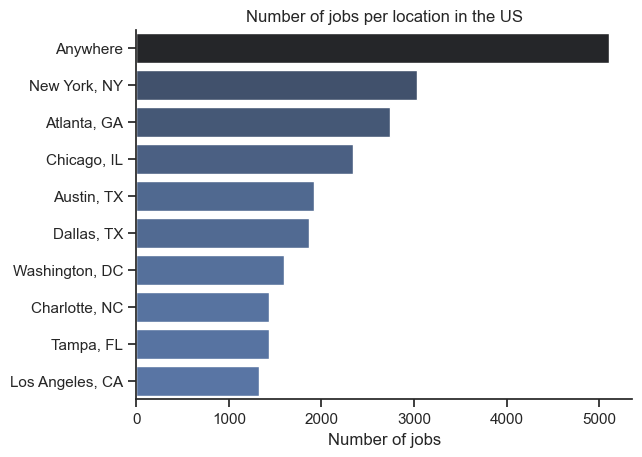

In [4]:
import seaborn as sns

df_locations = df_US['job_location'].value_counts().to_frame().head(10)
df_locations.columns = ['count']  # Set the column name to 'count'

sns.set_theme(style='ticks')
sns.barplot(data=df_locations, x='count', y=df_locations.index,hue ='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Number of jobs per location in the US')
plt.ylabel('')  # Correct usage as a function
plt.xlabel('Number of jobs')  # Correct usage as a function
plt.show()


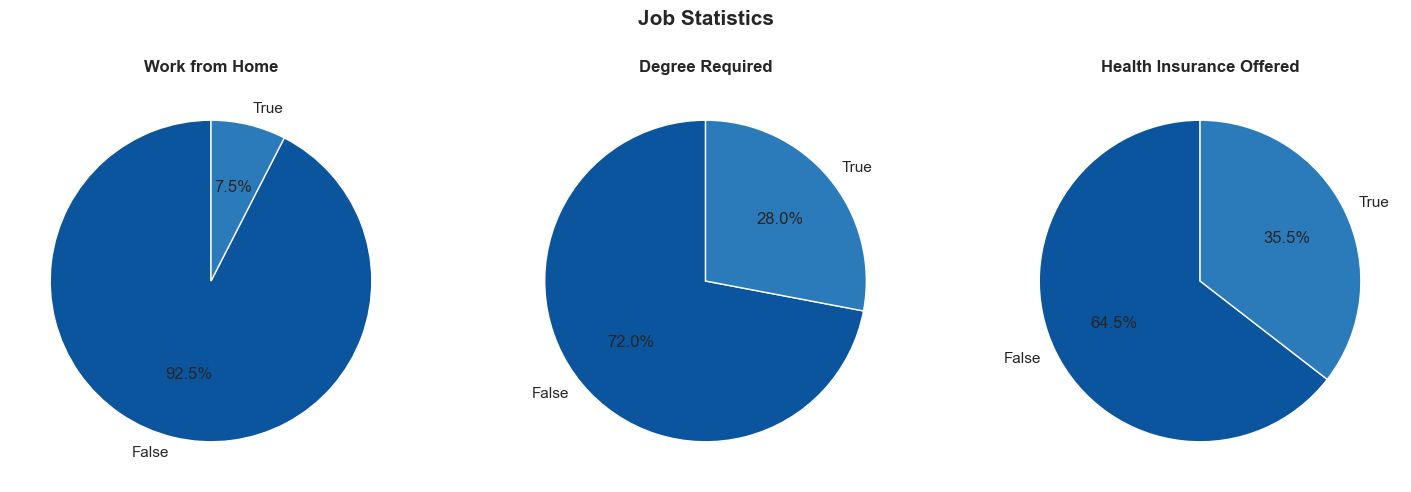

In [5]:
# Set Seaborn theme for consistent style
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Adjusted figure size for better spacing

# Dictionaries method
remote = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Degree Required',
    'job_health_insurance': 'Health Insurance Offered'
}

# Loop through the dictionary to create multiple pie plots
for i, (column, title) in enumerate(remote.items()):
    df_US[column].value_counts().plot(kind='pie', ax=ax[i], startangle=90, autopct='%1.1f%%', colors=sns.color_palette("Blues_r"))
    ax[i].set_title(title, fontweight='bold')  # Bold titles
    ax[i].set_ylabel('')  # Remove y-axis labels
    ax[i].set_xlabel('')  # Remove x-axis labels for a clean look

# Clean up the figure
fig.suptitle('Job Statistics', fontsize=15, fontweight='bold')  # Bold title for the entire figure

# Adjust layout to prevent overlap and leave space for the title
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the super title

# Show the plot
plt.show()


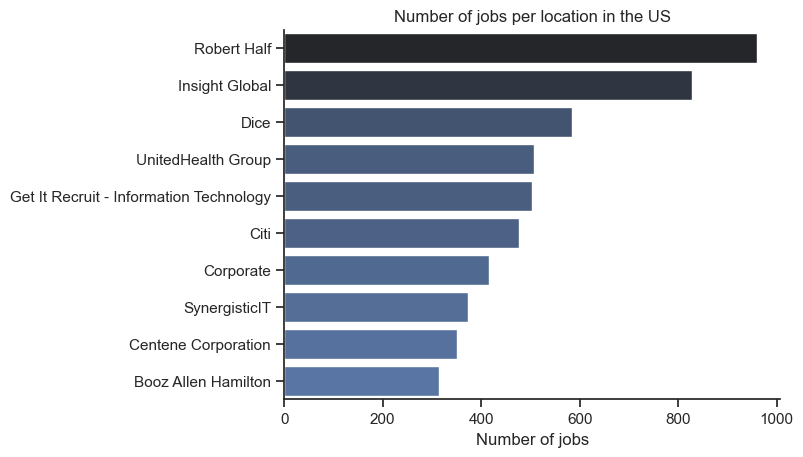

In [7]:
df_locations = df_US['company_name'].value_counts().to_frame().head(10)
df_locations.columns = ['count']  # Set the column name to 'count'

sns.set_theme(style='ticks')
sns.barplot(data=df_locations, x='count', y=df_locations.index,hue ='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Number of jobs per company in the US')
plt.ylabel('')  # Correct usage as a function
plt.xlabel('Number of jobs')  # Correct usage as a function
plt.show()